In [ ]:
import pandas as pd

df = pd.read_csv('/content/superstore_final_dataset (1).csv', encoding='latin1')
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [ ]:
df.info()
df.describe()
df.isnull().sum()
df = df.drop_duplicates()
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)


,Sales
Region,
West,710219.6845
East,660589.3560
Central,492646.9132
South,389151.4590


<Axes: xlabel='Product_Name', ylabel='Sales'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


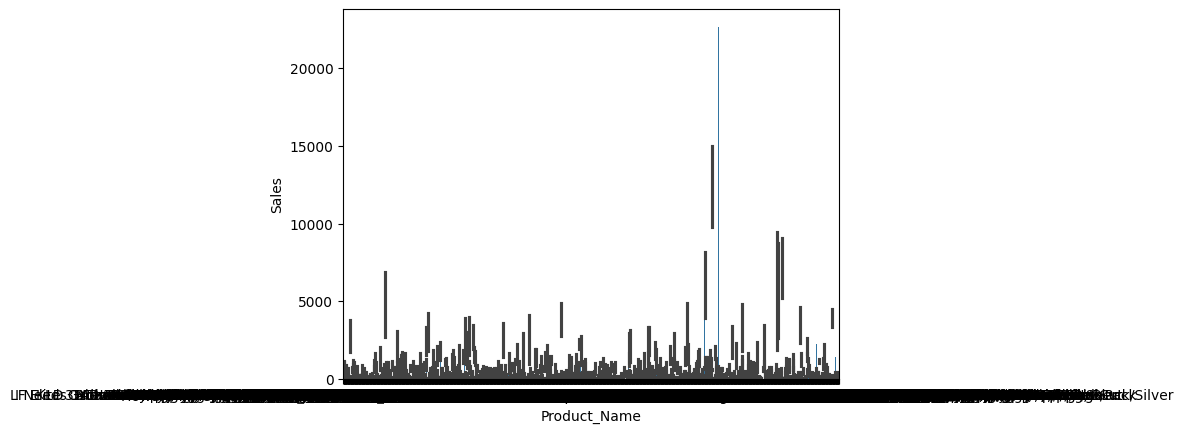

In [ ]:
import seaborn as sns
sns.barplot(x='Product_Name', y='Sales', data=df)


In [ ]:
df.groupby('Product_ID')['Sales'].sum().sort_values(ascending=False).head(10)


,Sales
Product_ID,
TEC-CO-10004722,61599.824
OFF-BI-10003527,27453.384
TEC-MA-10002412,22638.480
FUR-CH-10002024,21870.576
OFF-BI-10001359,19823.479
OFF-BI-10000545,19024.500
TEC-CO-10001449,18839.686
TEC-MA-10001127,18374.895
OFF-BI-10004995,17965.068


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

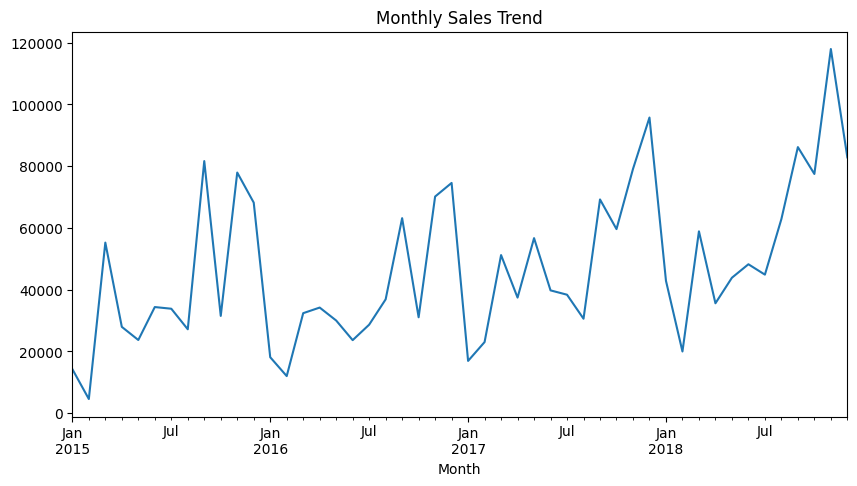

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
df['Month'] = df['Order_Date'].dt.to_period('M')


df.groupby('Month')['Sales'].sum().plot(kind='line', title='Monthly Sales Trend', figsize=(10,5))


<Axes: xlabel='Region', ylabel='Sales'>

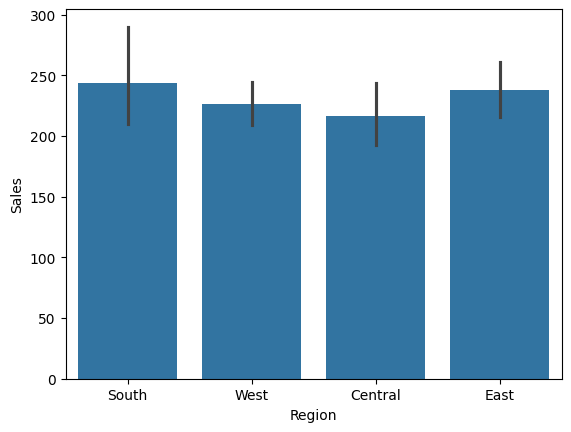

In [ ]:
import seaborn as sns
sns.barplot(x='Region', y='Sales', data=df)


In [ ]:
df.to_csv('/content/cleaned_sales_data.csv', index=False)
